In [1]:
import imageio
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

C:\Users\tyler\anaconda3\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\tyler\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [2]:
#############################
######### Problem 1 #########
#############################

In [3]:
img_blue1 = imageio.imread("Blue1.jfif")
img_blue2 = imageio.imread("Blue2.jfif")
img_blue3 = imageio.imread("Blue3.jfif")

img_green1 = imageio.imread("Green1.jpg")
img_green2 = imageio.imread("Green2.jfif")
img_green3 = imageio.imread("Green3.jpeg")

img_red1 = imageio.imread("Red1.jfif")
img_red2 = imageio.imread("Red2.jfif")
img_red3 = imageio.imread("Red3.jfif")

In [4]:
transform = transforms.ToTensor()

img_b1_t = transform(img_blue1)
img_b2_t = transform(img_blue2)
img_b3_t = transform(img_blue3)

img_g1_t = transform(img_green1)
img_g2_t = transform(img_green2)
img_g3_t = transform(img_green3)

img_r1_t = transform(img_red1)
img_r2_t = transform(img_red2)
img_r3_t = transform(img_red3)

In [5]:
print('Blue Images')
print(torch.mean(img_b1_t, dim=[1,2]))
print(torch.mean(img_b2_t, dim=[1,2]))
print(torch.mean(img_b3_t, dim=[1,2]))

print('Green Images')
print(torch.mean(img_g1_t, dim=[1,2]))
print(torch.mean(img_g2_t, dim=[1,2]))
print(torch.mean(img_g3_t, dim=[1,2]))

print('Red Images')
print(torch.mean(img_r1_t, dim=[1,2]))
print(torch.mean(img_r2_t, dim=[1,2]))
print(torch.mean(img_r3_t, dim=[1,2]))

Blue Images
tensor([0.1852, 0.4269, 0.7627])
tensor([0.0752, 0.2547, 0.5656])
tensor([0.0225, 0.1658, 0.4994])
Green Images
tensor([0.1148, 0.4722, 0.1004])
tensor([0.0303, 0.4447, 0.0454])
tensor([0.2405, 0.5219, 0.2077])
Red Images
tensor([0.6494, 0.1250, 0.1333])
tensor([0.6018, 0.0704, 0.0161])
tensor([0.5262, 0.1075, 0.1088])


In [6]:
#############################
######### Problem 2 #########
#############################

In [7]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [8]:
def model(t_u, w2, w1, b):
    return w2 * t_u**2 + w1 * t_u + b

In [9]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [10]:
w2 = torch.ones(()) #initial W is 1
w1 = torch.ones(())
b = torch.zeros(()) #initial b is 0
t_p = model(t_u, w2, w1, b)
t_p

tensor([1310.1901, 3180.7100, 3445.4399, 6789.5103, 3225.9900, 2440.1101,
        1183.1101,  497.0399, 2390.9600, 3708.5601, 4746.9600])

In [11]:
loss = loss_fn(t_p, t_c)
loss

tensor(11709471.)

In [12]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [13]:
def dmodel_dw(t_u, w2, w1, b):
    return t_u

In [14]:
def dmodel_dw2(t_u, w2, w1, b):
    return t_u**2

In [15]:
def dmodel_db(t_u, w2, w1, b):
    return 1.0

In [16]:
def grad_fn(t_u, t_c, t_p, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w2, w1, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w2 , w1, b)
    return torch.stack([dloss_dw2.sum(), dloss_dw.sum(), dloss_db.sum()])

In [17]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1,n_epochs+1):
        w2, w1, b = params
        
        t_p = model(t_u, w2, w1, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w2, w1, b)
        
        params = params - learning_rate * grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))       
    return params

In [18]:
t_un = t_u * 0.1

params = training_loop(
n_epochs = 5000,
learning_rate = .1,
params = torch.tensor([1.0,1.0,0.0]),
t_u = t_un,
t_c = t_c)
params

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [19]:
# %matplotlib inline
# t_p = model(t_un, *params)

# fig = plt.figure(dpi=300)
# plt.xlabel("Temperature (°Fahrenheit)")
# plt.ylabel("Temperature (°Celcius)")
# plt.plot(t_u.numpy(), t_p.detach().numpy())
# plt.plot(t_u.numpy(),t_c.numpy(), 'o')

In [20]:
params = training_loop(
n_epochs = 5000,
learning_rate = .01,
params = torch.tensor([1.0,1.0,0.0]),
t_u = t_un,
t_c = t_c)
params

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [21]:
# %matplotlib inline
# t_p = model(t_un, *params)

# fig = plt.figure(dpi=300)
# plt.xlabel("Temperature (°Fahrenheit)")
# plt.ylabel("Temperature (°Celcius)")
# plt.plot(t_u.numpy(), t_p.detach().numpy())
# plt.plot(t_u.numpy(),t_c.numpy(), 'o')

In [22]:
params = training_loop(
n_epochs = 5000,
learning_rate = .001,
params = torch.tensor([1.0,1.0,0.0]),
t_u = t_un,
t_c = t_c)
params

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan])

In [23]:
# %matplotlib inline
# t_p = model(t_un, *params)

# fig = plt.figure(dpi=300)
# plt.xlabel("Temperature (°Fahrenheit)")
# plt.ylabel("Temperature (°Celcius)")
# plt.plot(t_u.numpy(), t_p.detach().numpy())
# plt.plot(t_u.numpy(),t_c.numpy(), 'o')

In [24]:
params = training_loop(
n_epochs = 5000,
learning_rate = .0001,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


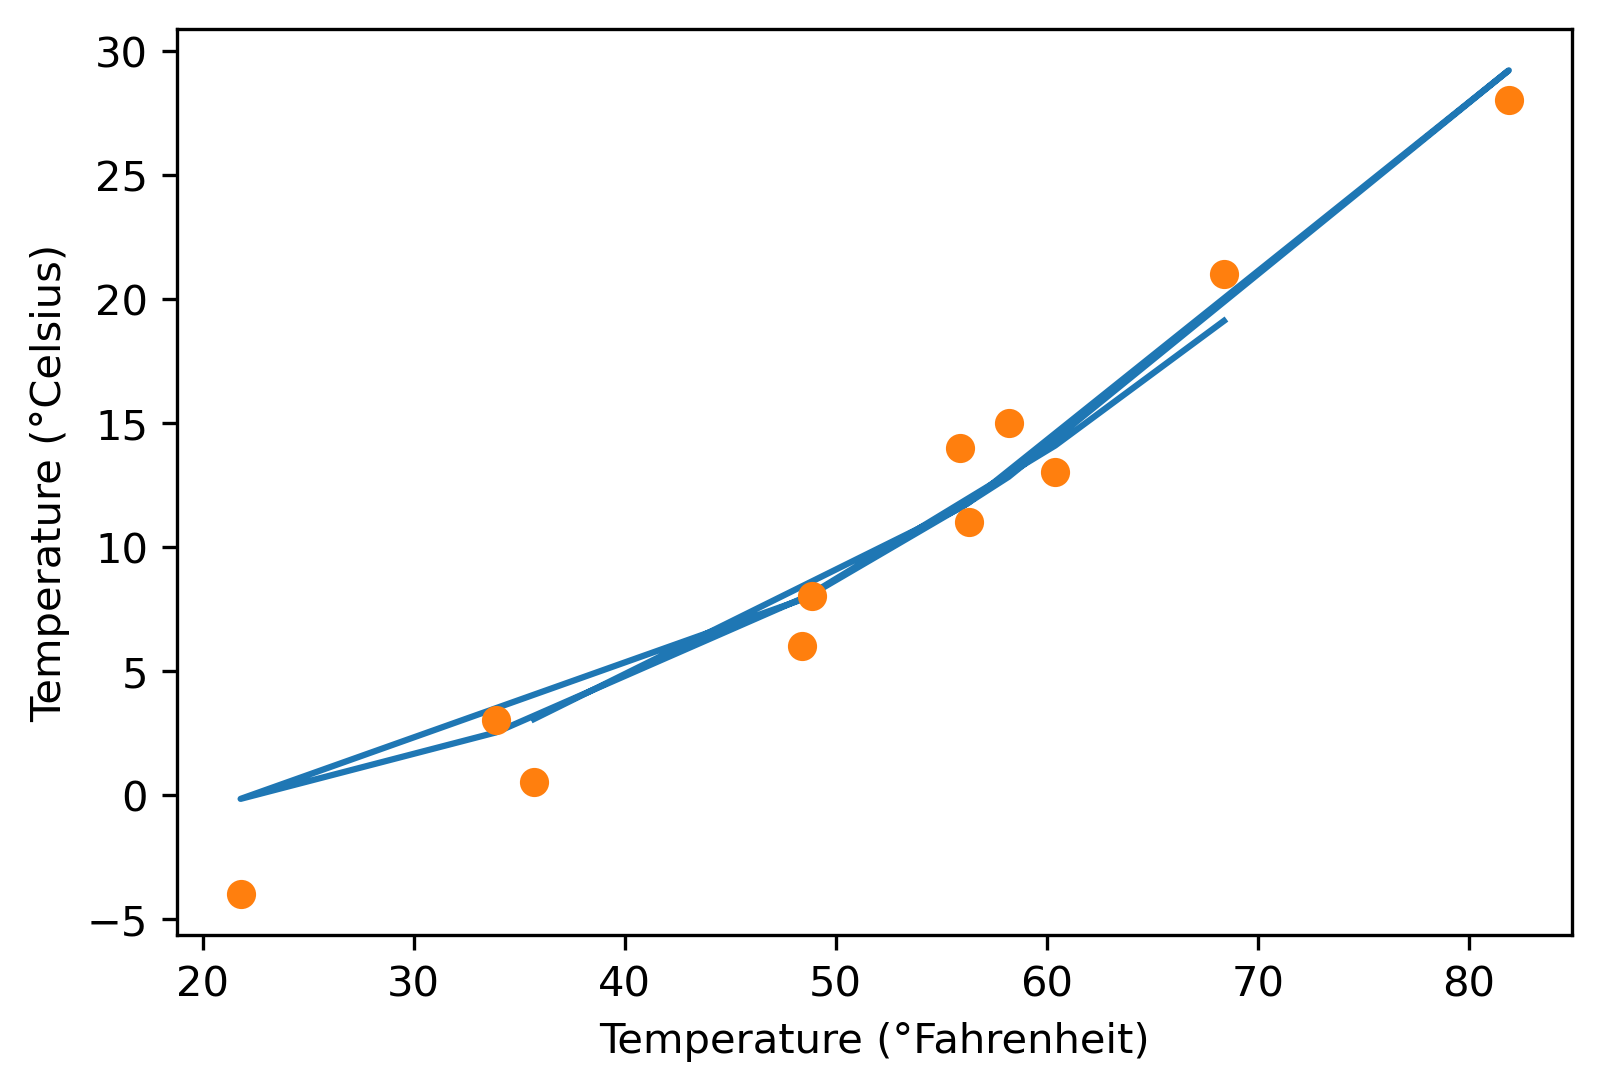

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p1 = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p1.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [26]:
#############################
######### Problem 3 #########
#############################

In [27]:
import pandas as pd
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [28]:
m = len(housing)
m

545

In [29]:
housing.shape

(545, 13)

In [30]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [31]:
area = torch.tensor(Newtrain['area'])
areaNorm = area / max(Newtrain['area'])
bedrooms = torch.tensor(Newtrain['bedrooms'])
bedroomsNorm = bedrooms / max(Newtrain['bedrooms'])
bathrooms = torch.tensor(Newtrain['bathrooms'])
bathroomsNorm = bathrooms / max(Newtrain['bathrooms'])
stories = torch.tensor(Newtrain['stories'])
storiesNorm = stories / max(Newtrain['stories'])
parking = torch.tensor(Newtrain['parking'])
parkingNorm = parking / max(Newtrain['parking'])
price = torch.tensor(Newtrain['price'])

W1 = torch.ones(())
W2 = torch.ones(())
W3 = torch.ones(())
W4 = torch.ones(())
W5 = torch.ones(())
B = torch.zeros(())

In [32]:
def model(X1, X2, X3, X4, X5, W1, W2, W3, W4, W5, B):
    model = W5*X5 + W4*X4 + W3*X3 + W2*X2 + W1*X1 + B
    return model

In [33]:
def loss_fn(t_p, price):
    squared_diffs = (t_p - price)**2
    return squared_diffs.mean()

In [34]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], 
requires_grad=True)

In [35]:
loss = loss_fn(model(area, bedrooms, bathrooms, stories, parking, *params), price)
loss.backward()
params.grad

tensor([-5.3383e+10, -2.9247e+07, -1.3220e+07, -1.8557e+07, -7.8404e+06,
        -9.5231e+06])

In [36]:
def training_loop(n_epochs, learning_rate, params, area, bedrooms, bathrooms, stories, parking, price):
    for epoch in range(1,n_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
                    
        t_p = model(area, bedrooms, bathrooms, stories, parking, *params)
        loss = loss_fn(t_p, price)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))       
    return params

In [43]:
params = training_loop(
n_epochs = 5000,
learning_rate = 0.1,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True),
area = areaNorm, bedrooms = bedroomsNorm, bathrooms = bathroomsNorm, stories = storiesNorm, parking = parkingNorm, price = price)

Epoch 500, Loss 1562038501376.000000
Epoch 1000, Loss 1533011427328.000000
Epoch 1500, Loss 1531161870336.000000
Epoch 2000, Loss 1531023589376.000000
Epoch 2500, Loss 1531010482176.000000
Epoch 3000, Loss 1531008778240.000000
Epoch 3500, Loss 1531008516096.000000
Epoch 4000, Loss 1531008516096.000000
Epoch 4500, Loss 1531008516096.000000
Epoch 5000, Loss 1531008516096.000000


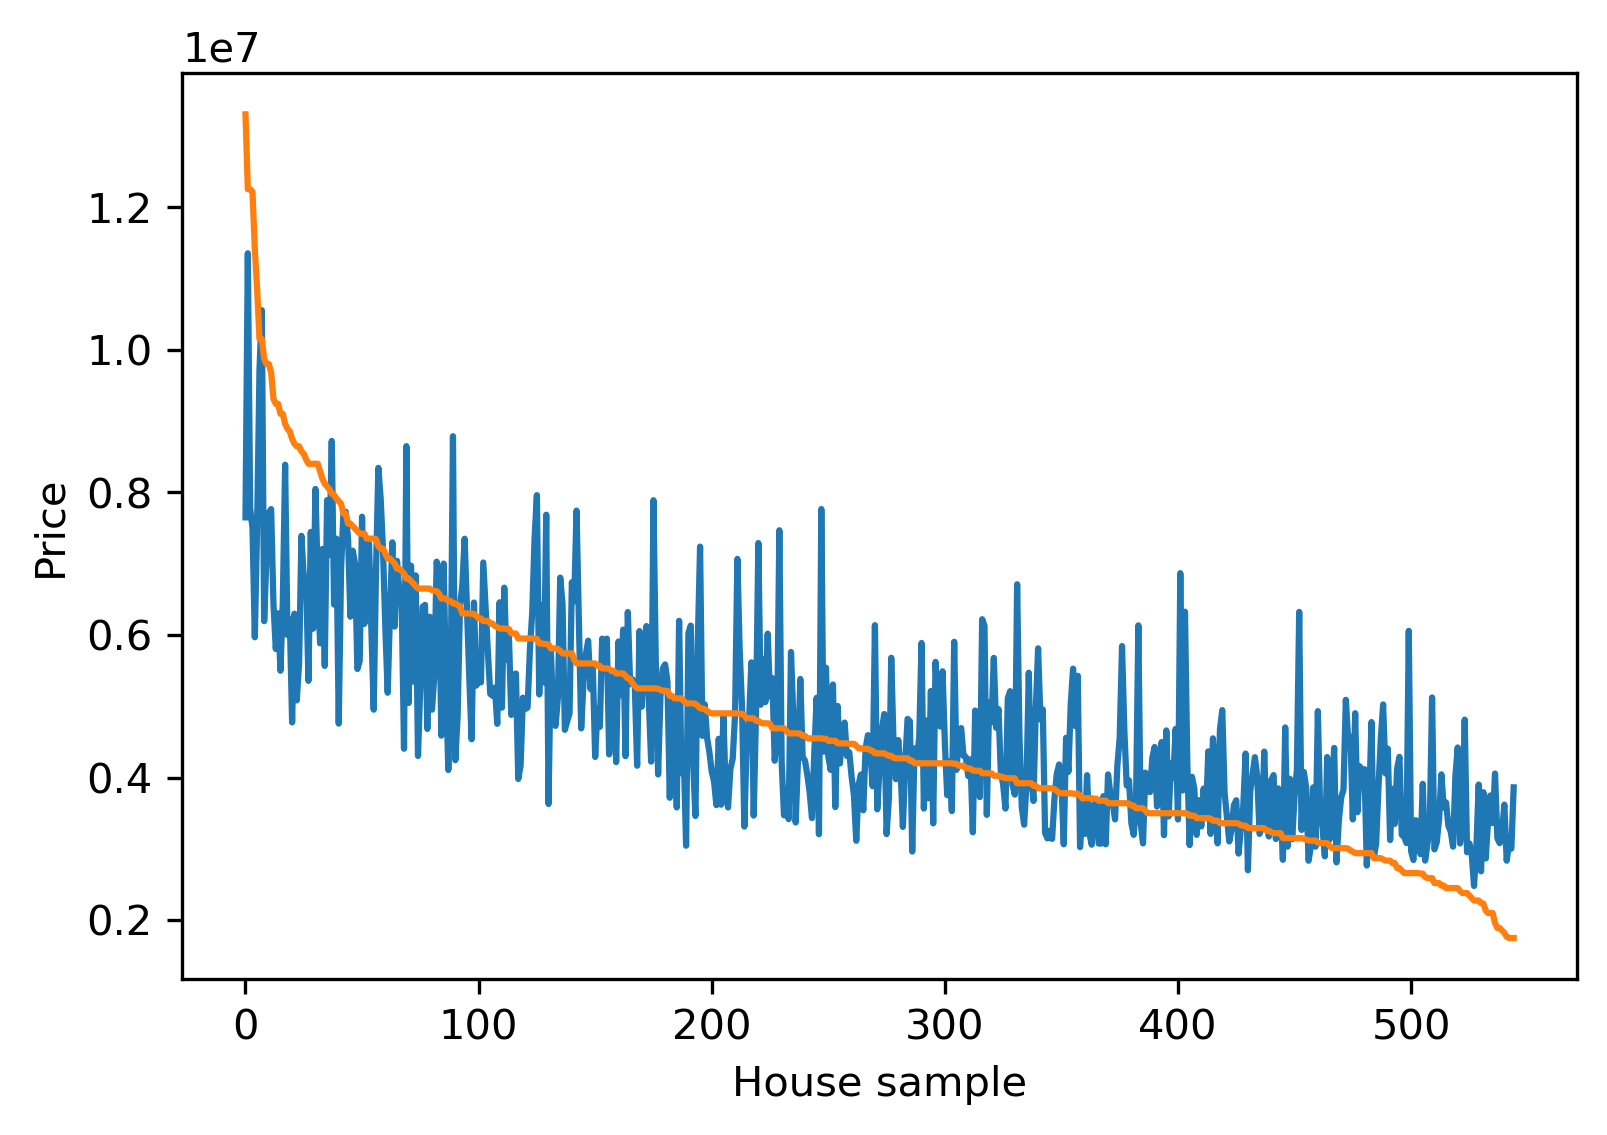

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
t_p1 = model(areaNorm, bedroomsNorm, bathroomsNorm, storiesNorm, parkingNorm, *params)
fig = plt.figure(dpi=300)
plt.xlabel("House sample")
plt.ylabel("Price")
plt.plot(t_p1.detach().numpy())
plt.plot(price)

In [39]:
params = training_loop(
n_epochs = 5000,
learning_rate = 0.01,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True),
area = areaNorm, bedrooms = bedroomsNorm, bathrooms = bathroomsNorm, stories = storiesNorm, parking = parkingNorm, price = price)

Epoch 500, Loss 2024805761024.000000
Epoch 1000, Loss 1863258734592.000000
Epoch 1500, Loss 1768051179520.000000
Epoch 2000, Loss 1704594898944.000000
Epoch 2500, Loss 1659788853248.000000
Epoch 3000, Loss 1627244199936.000000
Epoch 3500, Loss 1603242295296.000000
Epoch 4000, Loss 1585383211008.000000
Epoch 4500, Loss 1572023042048.000000
Epoch 5000, Loss 1561993281536.000000


In [40]:
params = training_loop(
n_epochs = 5000,
learning_rate = 0.001,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True),
area = areaNorm, bedrooms = bedroomsNorm, bathrooms = bathroomsNorm, stories = storiesNorm, parking = parkingNorm, price = price)

Epoch 500, Loss 3072061341696.000000
Epoch 1000, Loss 2296906776576.000000
Epoch 1500, Loss 2232370855936.000000
Epoch 2000, Loss 2193781817344.000000
Epoch 2500, Loss 2159230582784.000000
Epoch 3000, Loss 2127642755072.000000
Epoch 3500, Loss 2098654216192.000000
Epoch 4000, Loss 2071965073408.000000
Epoch 4500, Loss 2047316459520.000000
Epoch 5000, Loss 2024483717120.000000


In [41]:
params = training_loop(
n_epochs = 5000,
learning_rate = 0.0001,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True),
area = areaNorm, bedrooms = bedroomsNorm, bathrooms = bathroomsNorm, stories = storiesNorm, parking = parkingNorm, price = price)

Epoch 500, Loss 19251110871040.000000
Epoch 1000, Loss 14310294159360.000000
Epoch 1500, Loss 10812095725568.000000
Epoch 2000, Loss 8334880538624.000000
Epoch 2500, Loss 6580248510464.000000
Epoch 3000, Loss 5337011716096.000000
Epoch 3500, Loss 4455729725440.000000
Epoch 4000, Loss 3830616424448.000000
Epoch 4500, Loss 3386812137472.000000
Epoch 5000, Loss 3071338610688.000000
